In [34]:
import glob 
import cv2
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
import random
%matplotlib inline

# load and resize test image from 
cars = glob.glob("/home/cd/Downloads/Didi-Release-2/Data/Test/gt/19_f2/camera/test/*.jpg")
#cars
X = []
for name in cars:    
    X.append(name)
X = np.array(X)

print(X.shape)

x_sample=[]
y_sample=[]
x_test = []
for i in range(len(cars)):
    image = mpimg.imread(cars[i])
    # 
    resized_image = cv2.resize(image, (64, 64))
    
    x_sample.append(resized_image)
   
x_test = np.stack(x_sample) 
x_test.shape  

# normalize image

x_test = x_test/255.0

(10,)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import LearningRateScheduler, Callback

model = Sequential()
model.add(Lambda(lambda x: x - 0.5, input_shape=(64, 64, 3)))
model.add(Conv2D(1,  1, 1 , border_mode='same' ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3, border_mode='same'  ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3, border_mode='same'   ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, 3 ,border_mode='same'  ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3, border_mode='same' ) )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, 3 , border_mode='same' ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3, 3 , border_mode='same' ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(1, 1, 1 ,  activation="relu"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
adam = Adam(lr=1e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001)
model.compile(adam, 'mse', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_15 (Lambda)               (None, 64, 64, 3)     0           lambda_input_15[0][0]            
____________________________________________________________________________________________________
convolution2d_45 (Convolution2D) (None, 64, 64, 1)     4           lambda_15[0][0]                  
____________________________________________________________________________________________________
batchnormalization_41 (BatchNorm (None, 64, 64, 1)     4           convolution2d_45[0][0]           
____________________________________________________________________________________________________
activation_41 (Activation)       (None, 64, 64, 1)     0           batchnormalization_41[0][0]      
___________________________________________________________________________________________

In [23]:
model.load_weights("CarId_weights.h5")
        

In [35]:
pred = model.predict(x_test)
pred = np.around(np.squeeze(pred), decimals=4)


In [36]:
pred

array([ 0.        ,  0.99790001,  0.99989998,  0.9989    ,  0.86059999,
        0.98689997,  1.        ,  1.        ,  0.        ,  0.99940002], dtype=float32)

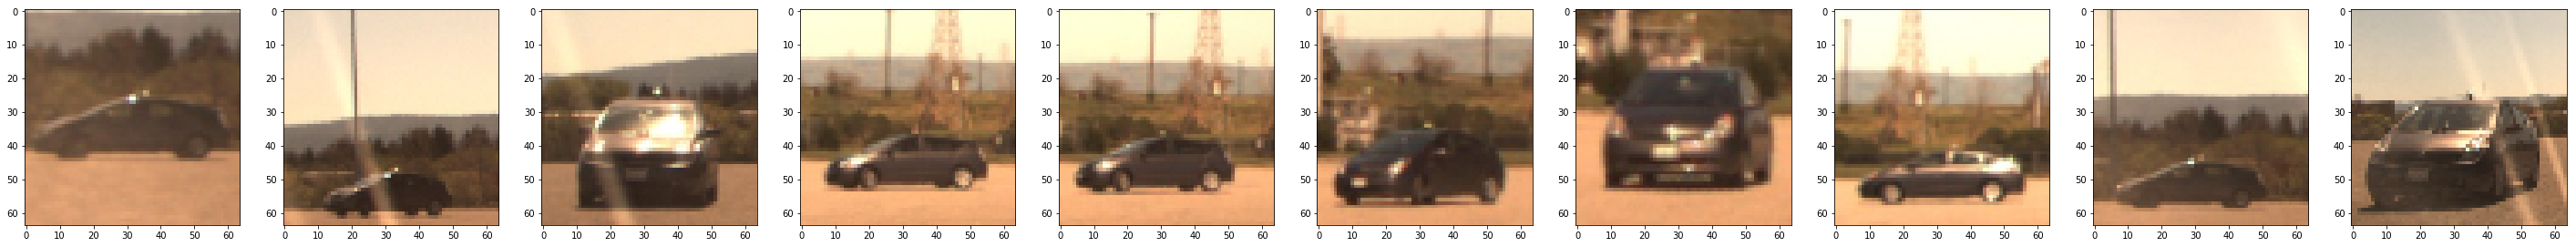

In [37]:
#index = random.randint(0, len(cars))
#plt.imshow(x_test[index])

plt.figure(2, figsize=(50,50))
for i in range(len(cars)):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])